In [1]:
!sudo apt-get update
!sudo apt install tesseract-ocr poppler-utils libmagickwand-dev
!sudo apt-get install tesseract-ocr-spa -y
!sudo apt-get install ghostscript python3-tk


Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:14 http://archive.ubuntu.com/ubuntu foc

In [2]:
!pip install 'PyPDF2<3.0'
!pip install pytesseract==0.3.9
!pip install  pdf2image "camelot-py[base]" pdfplumber


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 KB 8.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 KB 533.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.6/143.6 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 71.6 MB/s eta 0:00:00


In [1]:
import pytesseract
import shutil
import os
import random
import pandas as pd
try:
    from PIL import Image
except ImportError:
    import Image

from google.colab import files

import camelot
import pdfplumber
from pdf2image import convert_from_path, convert_from_bytes
 

#Preparación de los datos
## Extracción de los datos de pdf semiestructurado
veremos
- pdfplumber
- camelot

OCR:
- pytesseract

In [4]:
!wget https://camelot-py.readthedocs.io/en/master/_static/pdf/foo.pdf

--2023-02-22 17:49:17--  https://camelot-py.readthedocs.io/en/master/_static/pdf/foo.pdf
Resolving camelot-py.readthedocs.io (camelot-py.readthedocs.io)... 104.17.33.82, 104.17.32.82, 2606:4700::6811:2152, ...
Connecting to camelot-py.readthedocs.io (camelot-py.readthedocs.io)|104.17.33.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84158 (82K) [application/pdf]
Saving to: ‘foo.pdf’

foo.pdf             100%[===================>]  82.19K  --.-KB/s    in 0.02s   

2023-02-22 17:49:18 (3.82 MB/s) - ‘foo.pdf’ saved [84158/84158]



Reiniciar runtime!

In [2]:
fname_se = "foo.pdf"
fname_img= "foo_img.pdf"

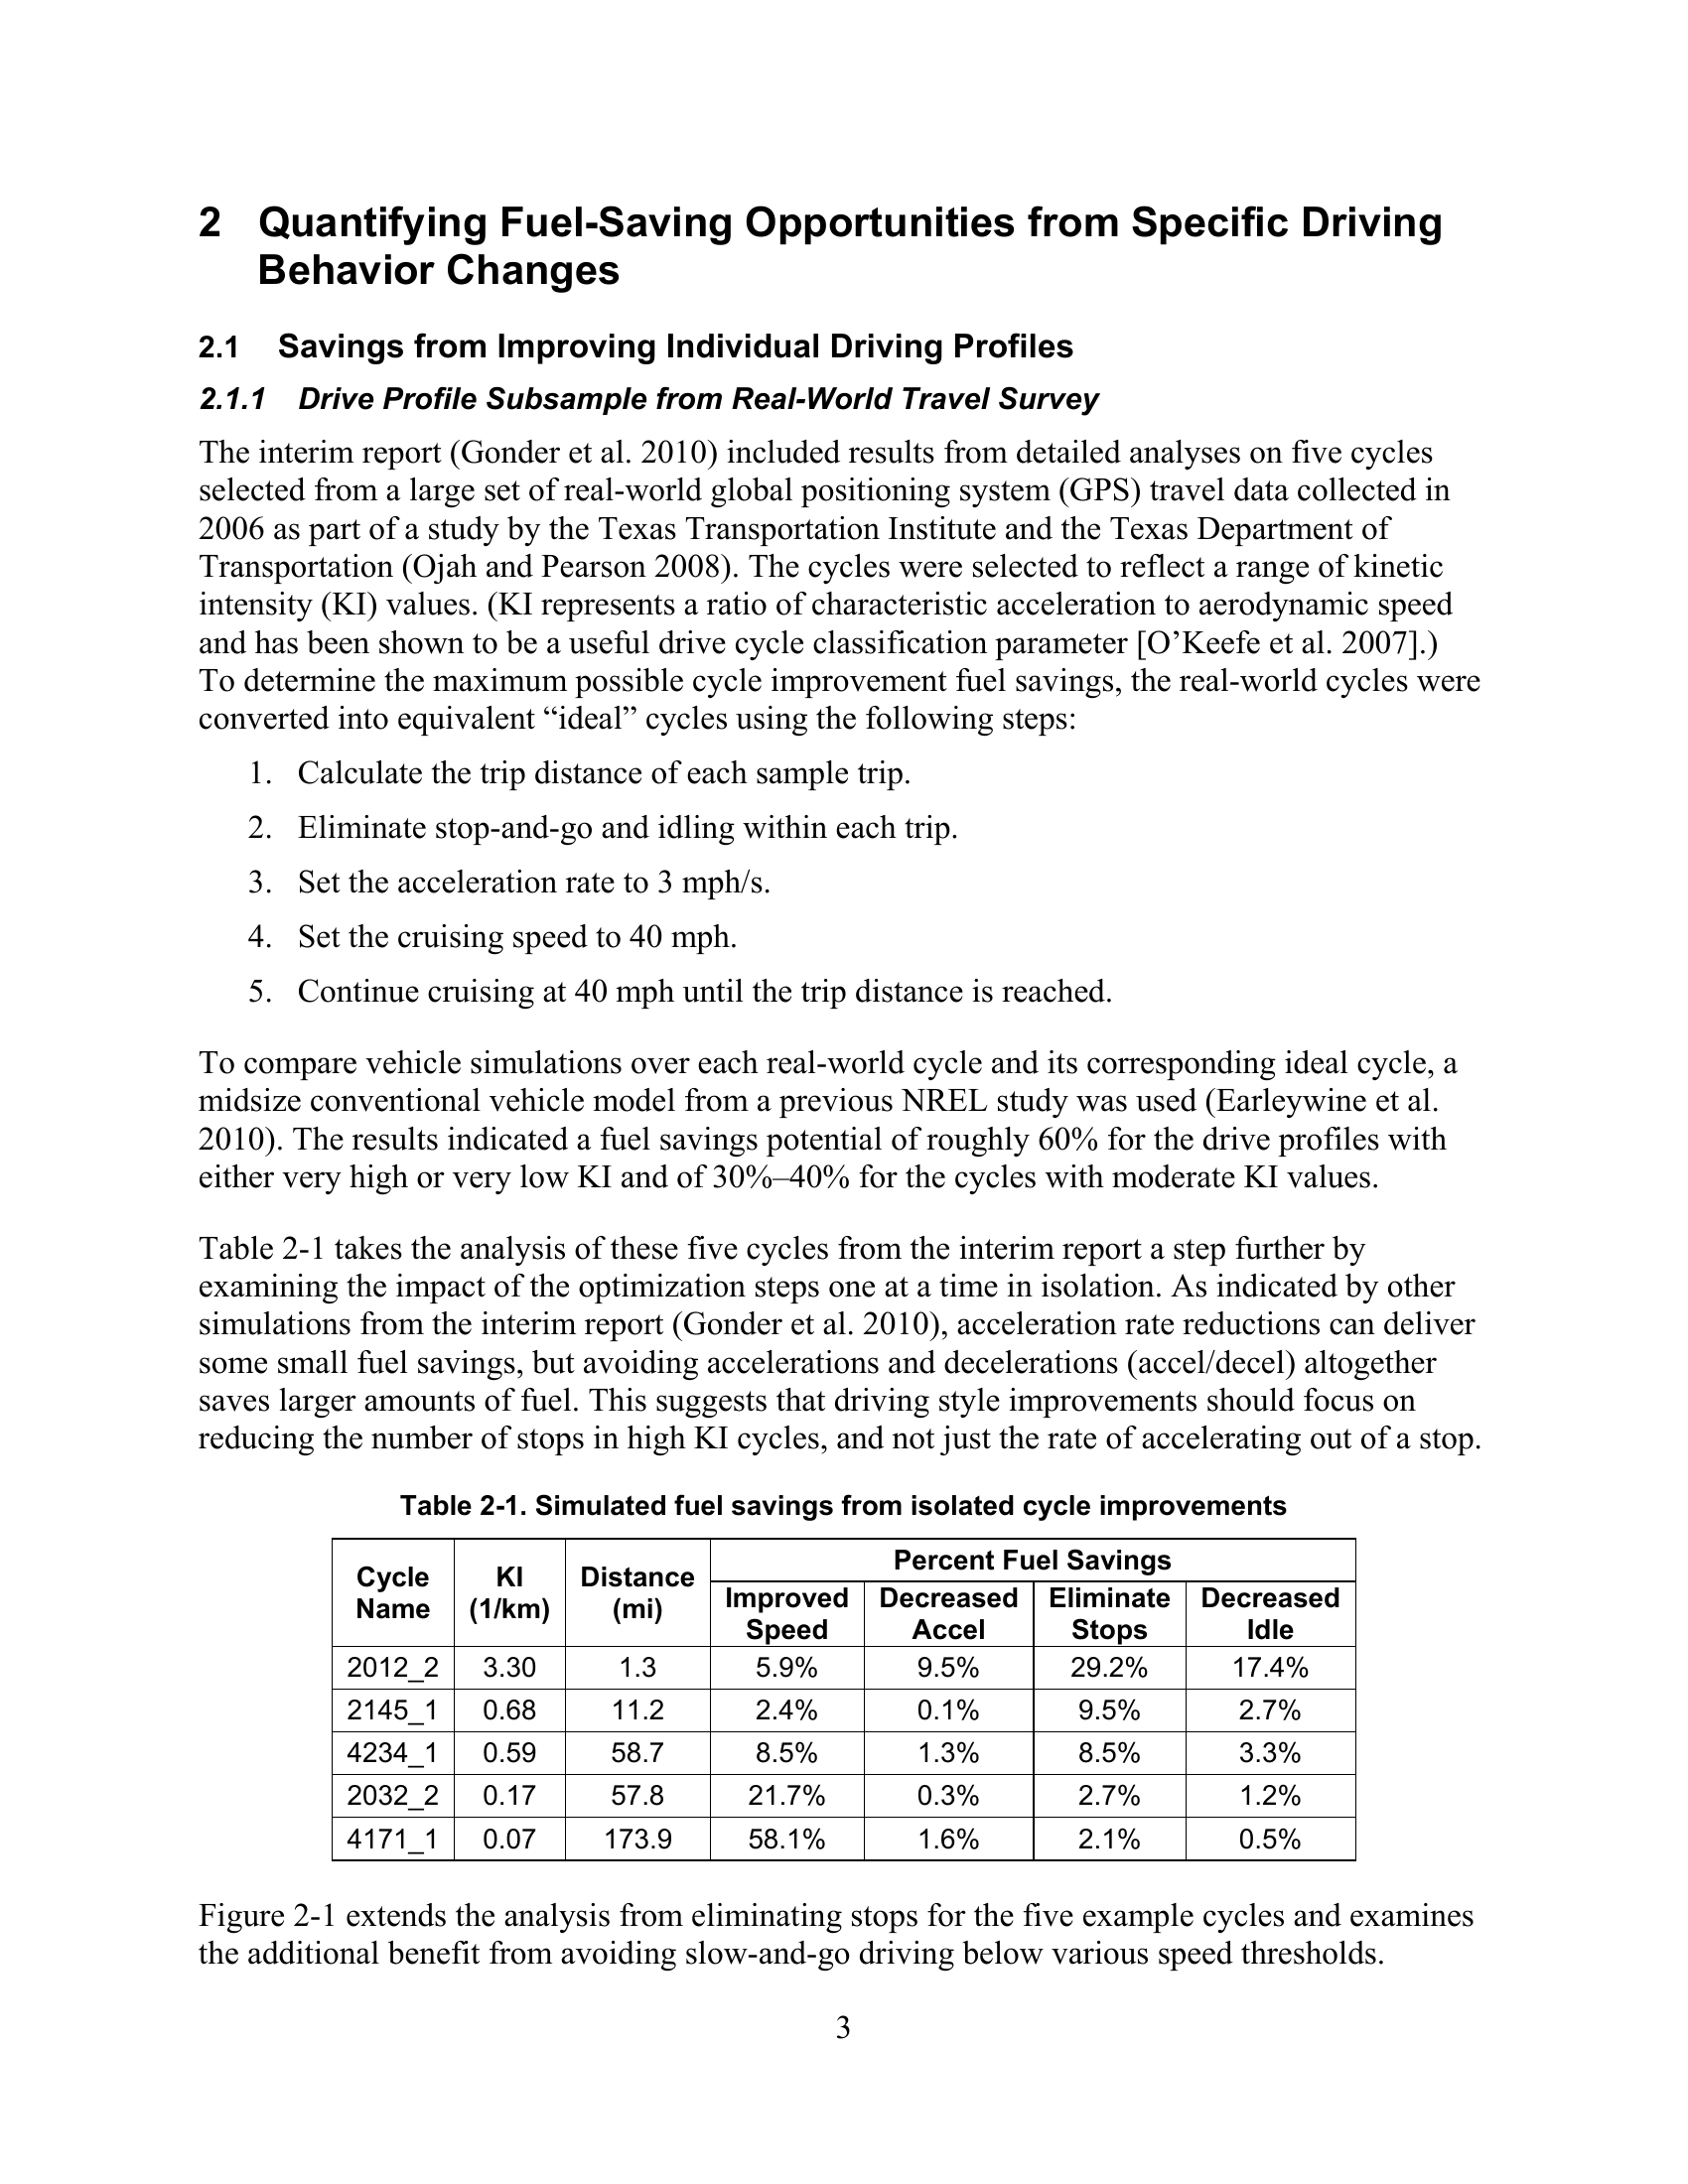

In [3]:
images = convert_from_path(fname_se)
images[0]  

##Conversión de los datos de pdf-semiestructurado a imagen

In [ ]:
#images = convert_from_path(fname_se)

In [4]:
images[0].save(fname_img, "PDF" ,resolution=100.0, save_all=True, append_images=images[1:])


# Extracción datos PDF Semi-estructurado

## Texto

In [5]:
pdf = pdfplumber.open(fname_se)
page = pdf.pages[0]
page

<Page:1>

In [6]:
txt_data = page.extract_text()
txt_data

'2 Quantifying Fuel-Saving Opportunities from Specific Driving\nBehavior Changes\n2.1 Savings from Improving Individual Driving Profiles\n2.1.1 Drive Profile Subsample from Real-World Travel Survey\nThe interim report (Gonder et al. 2010) included results from detailed analyses on five cycles\nselected from a large set of real-world global positioning system (GPS) travel data collected in\n2006 as part of a study by the Texas Transportation Institute and the Texas Department of\nTransportation (Ojah and Pearson 2008). The cycles were selected to reflect a range of kinetic\nintensity (KI) values. (KI represents a ratio of characteristic acceleration to aerodynamic speed\nand has been shown to be a useful drive cycle classification parameter [O’Keefe et al. 2007].)\nTo determine the maximum possible cycle improvement fuel savings, the real-world cycles were\nconverted into equivalent “ideal” cycles using the following steps:\n1. Calculate the trip distance of each sample trip.\n2. Elimin

In [7]:
txt_data_list = txt_data.strip().split("\n")



list(filter(len,map(lambda s:  ' '.join(s.split()), txt_data_list)))


['2 Quantifying Fuel-Saving Opportunities from Specific Driving',
 'Behavior Changes',
 '2.1 Savings from Improving Individual Driving Profiles',
 '2.1.1 Drive Profile Subsample from Real-World Travel Survey',
 'The interim report (Gonder et al. 2010) included results from detailed analyses on five cycles',
 'selected from a large set of real-world global positioning system (GPS) travel data collected in',
 '2006 as part of a study by the Texas Transportation Institute and the Texas Department of',
 'Transportation (Ojah and Pearson 2008). The cycles were selected to reflect a range of kinetic',
 'intensity (KI) values. (KI represents a ratio of characteristic acceleration to aerodynamic speed',
 'and has been shown to be a useful drive cycle classification parameter [O’Keefe et al. 2007].)',
 'To determine the maximum possible cycle improvement fuel savings, the real-world cycles were',
 'converted into equivalent “ideal” cycles using the following steps:',
 '1. Calculate the trip dis

## Tablas
Otra Alternativa sería tabula

In [8]:
table=page.extract_table()
table

[['Cycle\nName',
  'KI\n(1/km)',
  'Distance\n(mi)',
  'Percent Fuel Savings',
  None,
  None,
  None],
 [None,
  None,
  None,
  'Improved\nSpeed',
  'Decreased\nAccel',
  'Eliminate\nStops',
  'Decreased\nIdle'],
 ['2012_2', '3.30', '1.3', '5.9%', '9.5%', '29.2%', '17.4%'],
 ['2145_1', '0.68', '11.2', '2.4%', '0.1%', '9.5%', '2.7%'],
 ['4234_1', '0.59', '58.7', '8.5%', '1.3%', '8.5%', '3.3%'],
 ['2032_2', '0.17', '57.8', '21.7%', '0.3%', '2.7%', '1.2%'],
 ['4171_1', '0.07', '173.9', '58.1%', '1.6%', '2.1%', '0.5%']]

**camelot**

In [9]:
tables = camelot.read_pdf(fname_se)
tables


<TableList n=1>

In [10]:
tables[0].parsing_report


{'accuracy': 99.02, 'whitespace': 12.24, 'order': 1, 'page': 1}

In [11]:
tables[0].df

,0,1,2,3,4,5,6
0,Cycle \nName,KI \n(1/km),Distance \n(mi),Percent Fuel Savings,,,
1,,,,Improved \nSpeed,Decreased \nAccel,Eliminate \nStops,Decreased \nIdle
2,2012_2,3.30,1.3,5.9%,9.5%,29.2%,17.4%
3,2145_1,0.68,11.2,2.4%,0.1%,9.5%,2.7%
4,4234_1,0.59,58.7,8.5%,1.3%,8.5%,3.3%
5,2032_2,0.17,57.8,21.7%,0.3%,2.7%,1.2%
6,4171_1,0.07,173.9,58.1%,1.6%,2.1%,0.5%


Images

In [12]:
page.images

[]

# Extracción datos PDF tipo imagen

In [13]:
images = convert_from_path(fname_img)


In [14]:
print(len(images))

1


In [15]:
extractedInformation = pytesseract.image_to_string(images[0])
print(extractedInformation)

2 Quantifying Fuel-Saving Opportunities from Specific Driving
Behavior Changes

2.1 Savings from Improving Individual Driving Profiles
2.1.1 Drive Profile Subsample from Real-World Travel Survey

The interim report (Gonder et al. 2010) included results from detailed analyses on five cycles
selected from a large set of real-world global positioning system (GPS) travel data collected in
2006 as part of a study by the Texas Transportation Institute and the Texas Department of
Transportation (Ojah and Pearson 2008). The cycles were selected to reflect a range of kinetic
intensity (KI) values. (KI represents a ratio of characteristic acceleration to aerodynamic speed
and has been shown to be a useful drive cycle classification parameter [O’ Keefe et al. 2007].)
To determine the maximum possible cycle improvement fuel savings, the real-world cycles were
converted into equivalent “ideal” cycles using the following steps:

1. Calculate the trip distance of each sample trip.

2. Eliminate stop-

¿Qué posibles problemas vemos en todo esto?

# Ejercicio práctico
A continuación se muestran dos PDFs, uno de tipo imagen y otro de formato XML. 
1. Extrae todo el texto contenido en cada uno de ellos y observa las diferencias. 
2. El fichero XML se corresponde con un report de advertencias. Genera un dataframe con las columnas correctas. A partir de ahí, saca qué empresa ha sido la única que le han advertido más veces (2), para aquellos casos en los que el Notice Data haya sido en Junio. Es decir: saca un nuevo dataframe para los que el Notice Date sea de Junio y a partir de ahí mira qué compañía la han advertido más veces.

In [16]:
pdf_url = "https://github.com/jsvine/pdfplumber/blob/stable/examples/pdfs/ca-warn-report.pdf"
# https://drive.google.com/file/d/1ZuOo3_Qfe4xGoUVoTJn8c9nOcNuKu20q/view?usp=sharing
uploaded = files.upload()

Saving ca-warn-report.pdf to ca-warn-report.pdf


Ejemplo de la complejidad de realizar un OCR en sistemas como un ID

In [ ]:
!wget  -O id.png https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Spanish_ID_card_%28front_side%29.webp/473px-Spanish_ID_card_%28front_side%29.webp.png

In [ ]:
import cv2
import pytesseract
from matplotlib import pyplot as plt
import numpy as np

def display_img(cvImg):
    cvImg = cv2.cvtColor(cvImg, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,8))
    plt.imshow(cvImg)
    plt.axis('off')
    plt.show()

In [ ]:

image = cv2.imread("id.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray,11,18,18)

gray = cv2.GaussianBlur(gray,(5,5), 0)

kernel = np.ones((2,2), np.uint8)


gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,11,2)
#img_dilation = cv2.erode(gray, kernel, iterations=1)


#cv2.imshow("dilation", img_dilation)

display_img(gray)

#text = pytesseract.image_to_string(gray, lang='spa')
#print(text)
